# Final Project - Image Compression with KNN and PCA

The final project is an **individual** assignment.  You may of course discuss with others, but each student should submit their own proposal and their own project.

**Name**: Seth Abuhamdeh

## Final project grading rubric

24 total points
* 8 points - Clarity
* 8 points - Use of Math 178 concepts
* 8 points - Extension/adaptation of original source

The following are requirements to receive a passing grade on the project.
* Based on an existing tutorial / blog post / etc.
* Provide a clear reference to the original source (including a hyperlink if the reference is online).
* Clearly explain what you did to alter the original source.
* No explanatory text reused from another source (including AI) without a clear reference.
* The code must run on Deepnote and be shared through Deepnote.
* Clearly reference the source of any code you use (including code produced by AI).  It's okay to use some code that you do not fully understand, as long as you clearly explain the origin of the code.  You should be able to explain the code that you produce yourself in case we have any questions about it.

# Original Tutorial

 https://www.kaggle.com/code/mirzarahim/introduction-to-pca-image-compression-example

Uses PCA to compress an image by converting it to greyscale first.

# Summary

My project will alter this tutorial by first attempting to use the KNN algorithm to compress different images instead. Then also using PCA with color to compress images. Then comparing how many components account for 90% of the variance for different types of images and seeing if that affects the compression of the image in both color and greyscale.

## Project



Preliminary Stuff: Importing necessary libraries. Loading the original images and displaying them before compression.

In [ ]:
!apt-get update
!apt-get install -y libgl1-mesa-glx


Get:1 http://deb.debian.org/debian buster InRelease [122 kB]
Get:2 http://deb.debian.org/debian-security buster/updates InRelease [34.8 kB]
Get:3 http://deb.debian.org/debian buster-updates InRelease [56.6 kB]
Get:4 http://deb.debian.org/debian buster/main amd64 Packages [7,909 kB]
Get:5 http://deb.debian.org/debian-security buster/updates/main amd64 Packages [598 kB]
Get:6 http://deb.debian.org/debian buster-updates/main amd64 Packages [8,788 B]
Fetched 8,729 kB in 2s (4,930 kB/s)




The following additional packages will be installed:
  libdrm-amdgpu1 libdrm-common libdrm-intel1 libdrm-nouveau2 libdrm-radeon1
  libdrm2 libgl1 libgl1-mesa-dri libglapi-mesa libglvnd0 libglx-mesa0 libglx0
  libllvm7 libpciaccess0 libsensors-config libsensors5 libx11-xcb1
  libxcb-dri2-0 libxcb-dri3-0 libxcb-glx0 libxcb-present0 libxcb-sync1
  libxshmfence1 libxxf86vm1
Suggested packages:
  pciutils lm-sensors
The following NEW packages will be installed:
  libdrm-amdgpu1 libdrm-common libdrm-intel1 lib

In [ ]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd, sys, math , time
from matplotlib.image import imread
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, IncrementalPCA
from datetime import timedelta
from PIL import Image
from skimage.metrics import mean_squared_error
import cv2
import os
from imageio import imread, imwrite
import imageio.v2 as imageio

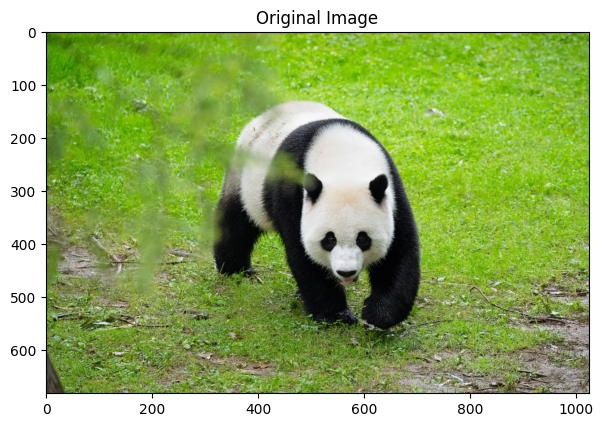

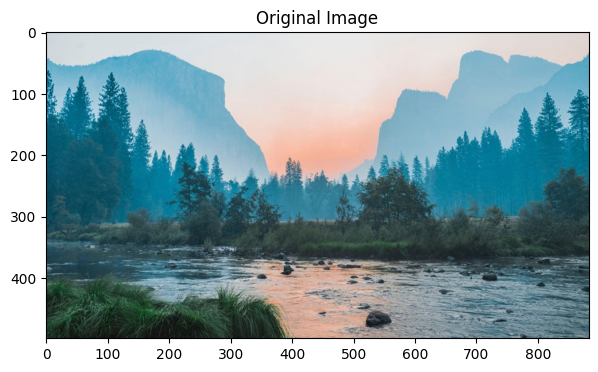

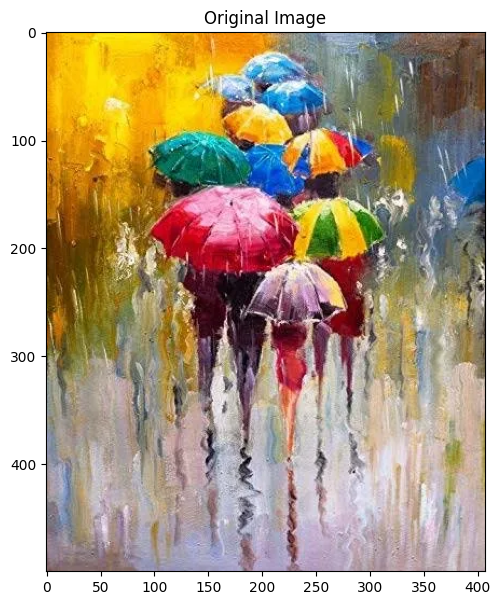

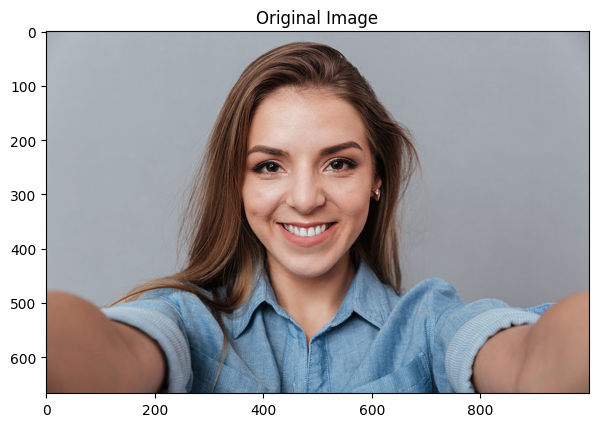

In [ ]:
def show_img(p):
    image = imageio.imread(p)
    return image

for p in ["panda.webp", "landscape-phot.jpg", 'umbrella.webp', 'woman-selfie.jpg']:
    fig, ax = plt.subplots(figsize = (7,7))
    ax.imshow(show_img(p = p))
    ax.set_title('Original Image')
    plt.show()


# Using KNN For Image Compression

In [ ]:

def get_clstrd_image(k, p, ca=0):
    # Reshape image
    image = imagio.imread(p)
    pixels = image.reshape((image.shape[0] * image.shape[1], image.shape[2]))
    pixels = pixels.astype(np.float64)

    # Randomly choosing cluster centers
    centroids = pixels[np.random.randint(pixels.shape[0], size=k), :]

    clas = np.empty([pixels.shape[0], centroids.shape[0]], dtype=np.float64)
    i = 0
    converged = False
    start = time.time()

    while not converged:
        i += 1
        pt_1 = np.sum(pixels**2, axis=1)[:, np.newaxis]
        pt_2 = np.sum(centroids**2, axis=1)
        pt_3 = -2 * np.dot(pixels, centroids.T)
        S = pt_1 + pt_2 + pt_3
        clas = np.ceil(np.sqrt(np.abs(S)))

        # class is assigned as clstr_assignment, as class is a function
        clstr_assignment = np.argmin(clas, axis=1)

        # Updating Cluster location(s)
        centroids_old = centroids.copy()
        c_a = [[i] for i in clstr_assignment]
        image_2_ca = np.append(pixels, c_a, axis=1)

        for cntrd in range(0, centroids.shape[0]):
            points_assigned = image_2_ca[image_2_ca[:, -1] == cntrd]
            if len(points_assigned) > 0:
                centroids[cntrd] = np.ceil(np.sum(points_assigned[:, :-1], axis=0) / len(points_assigned))
            else:
                # Handle the case where no points are assigned to the centroid
                centroids[cntrd] = pixels[np.random.randint(pixels.shape[0])]

        if (centroids_old == centroids).all():
            converged = True

    if ca == 1:
        return clstr_assignment, centroids
    else:
        end = time.time()
        Delta = end - start
        Elapsed = str(timedelta(seconds=Delta))
        print(f'cluster of k = {k} converged at {i} iterations, and took {Elapsed} seconds')

        # Updating each datapoint to its respective Centroid value
        image_2_cac = image_2_ca.copy()
        for i in range(image_2_ca.shape[0]):
            image_2_cac[i][:-1] = centroids[int(image_2_cac[i][-1])]
        image_2_cac = image_2_cac[:, :-1]
        final = np.reshape(image_2_cac, (image.shape[0], image.shape[1], image.shape[2]), order="C")
        final = final.astype(dtype='uint8')
        # Final image 
        img = Image.fromarray(final, 'RGB')
        return img


Displaying the compressed images at K =2, 4, 8, 16

Note: Running this does take a few minutes

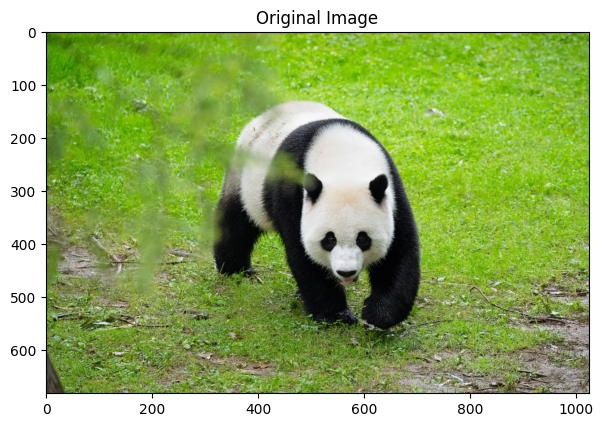

/tmp/ipykernel_105/3849534721.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imagio.imread(p)
cluster of k = 2 converged at 32 iterations, and took 0:00:24.182196 seconds
cluster of k = 4 converged at 12 iterations, and took 0:00:09.385894 seconds
cluster of k = 8 converged at 15 iterations, and took 0:00:12.902018 seconds
cluster of k = 16 converged at 21 iterations, and took 0:00:22.365875 seconds


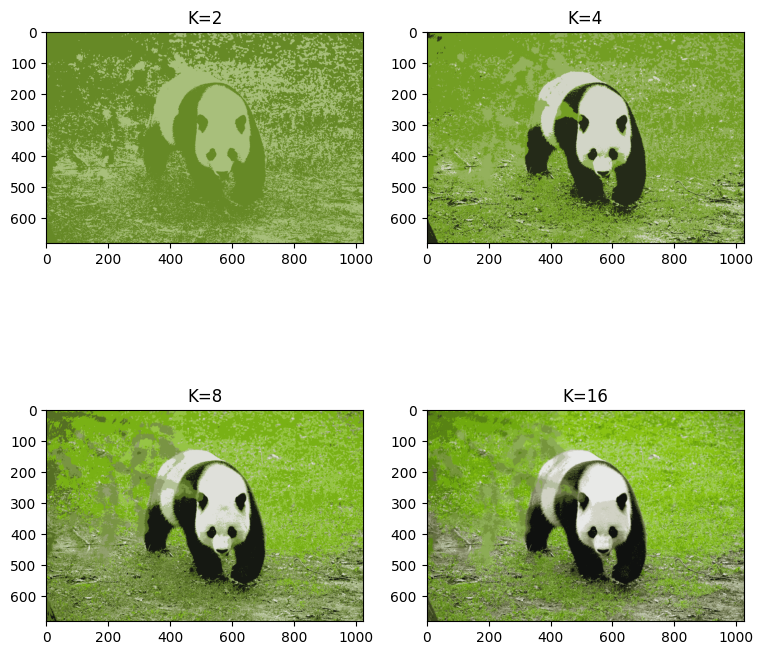

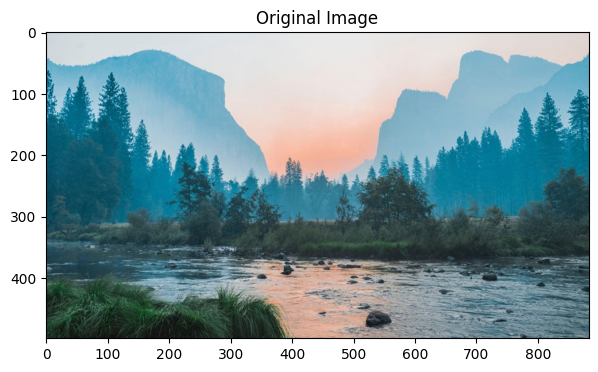

cluster of k = 2 converged at 5 iterations, and took 0:00:02.478697 seconds
cluster of k = 4 converged at 5 iterations, and took 0:00:02.638873 seconds
cluster of k = 8 converged at 16 iterations, and took 0:00:09.415522 seconds
cluster of k = 16 converged at 30 iterations, and took 0:00:21.170849 seconds


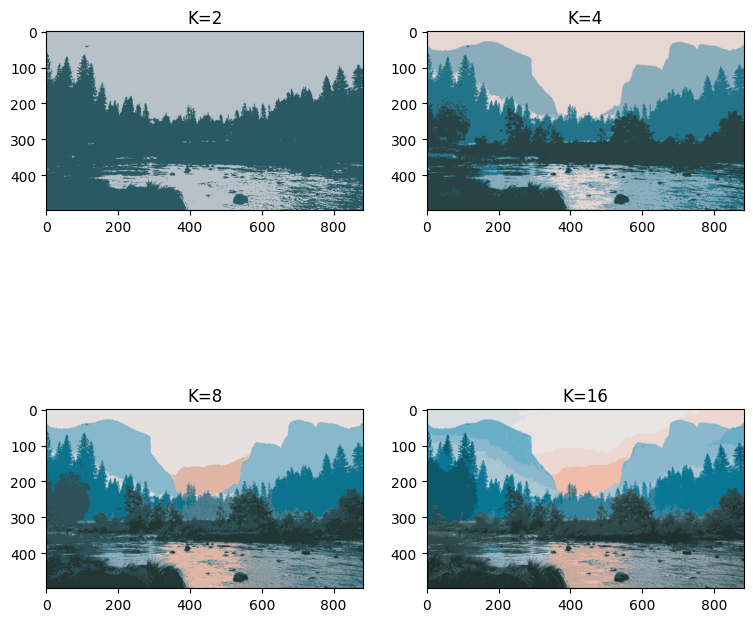

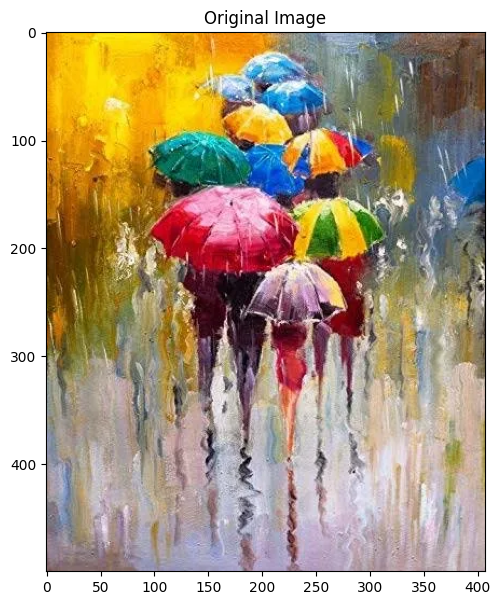

cluster of k = 2 converged at 9 iterations, and took 0:00:02.849502 seconds
cluster of k = 4 converged at 27 iterations, and took 0:00:08.589240 seconds
cluster of k = 8 converged at 47 iterations, and took 0:00:15.393113 seconds
cluster of k = 16 converged at 32 iterations, and took 0:00:11.696479 seconds


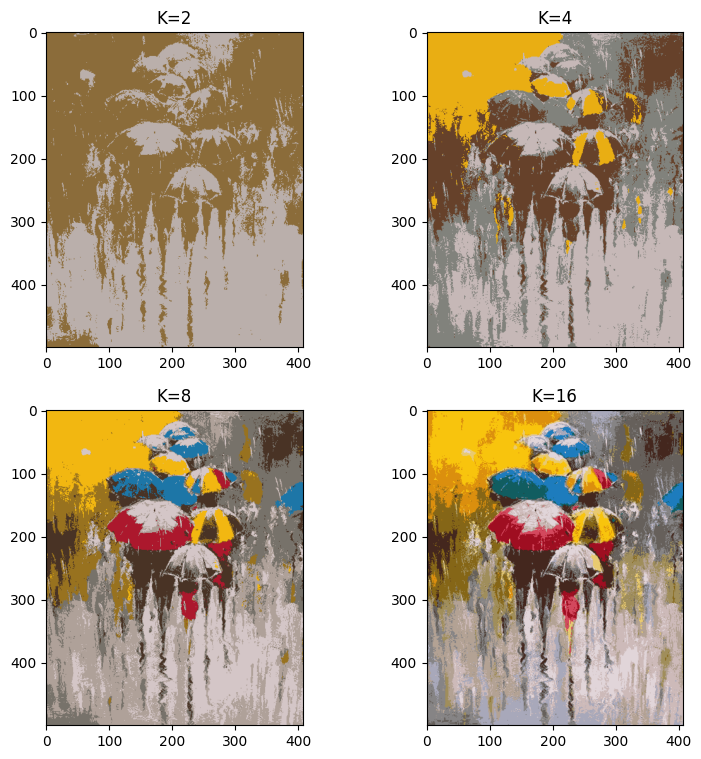

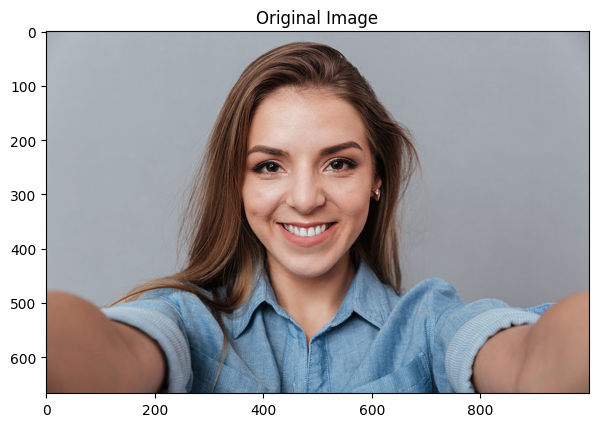

cluster of k = 2 converged at 8 iterations, and took 0:00:05.794665 seconds
cluster of k = 4 converged at 13 iterations, and took 0:00:09.900758 seconds
cluster of k = 8 converged at 26 iterations, and took 0:00:21.254972 seconds
cluster of k = 16 converged at 45 iterations, and took 0:00:44.940398 seconds


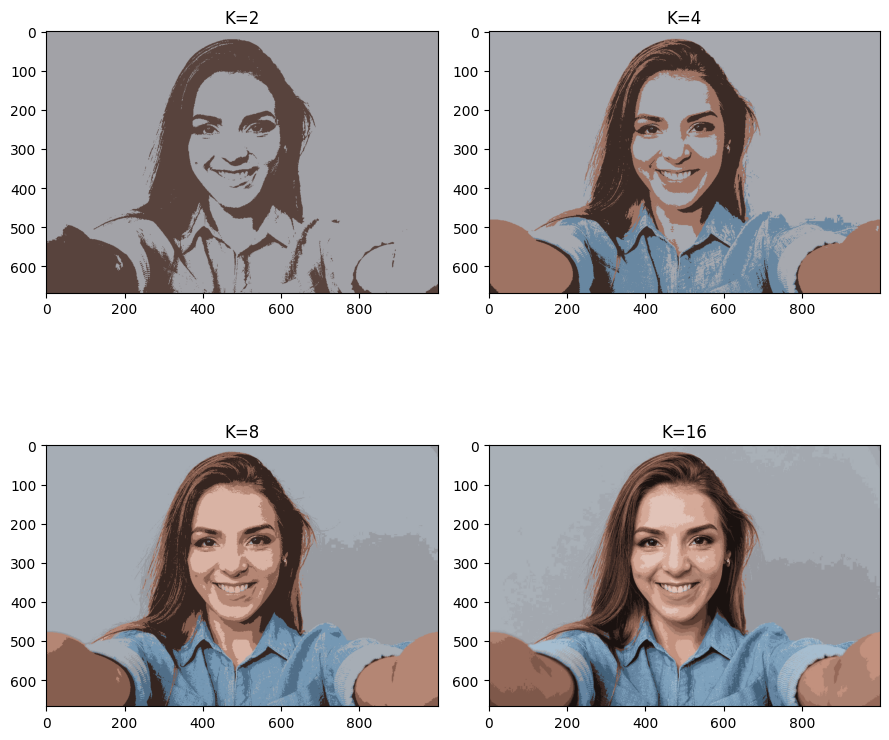

In [ ]:
for p in [ "panda.webp", "landscape-phot.jpg", 'umbrella.webp', 'woman-selfie.jpg' ]:
    #Show orinal image again for easy comparison
    fig, ax = plt.subplots(figsize = (7,7))
    ax.imshow(show_img(p = p))
    ax.set_title('Original Image')
    plt.show()

    #show compressed images
    fig, ax = plt.subplots(2,2,figsize = (9,9))
    ax[0,0].imshow(get_clstrd_image(k=2, p = p, ca = 0))
    ax[0,0].set_title('K=2')
    ax[0,1].imshow(get_clstrd_image(k=4, p = p, ca = 0))
    ax[0,1].set_title('K=4')
    ax[1,0].imshow(get_clstrd_image(k=8, p = p, ca = 0))
    ax[1,0].set_title('K=8')
    ax[1,1].imshow(get_clstrd_image(k=16, p = p, ca = 0))
    ax[1,1].set_title('K=16')
fig.tight_layout()
plt.show()

As we can see, we can use KNN for compressing images but with varying results. For K = 2, and 4, there are very noticable differences between the original images and the compressed. In some cases, it looks almost nothing like the original image. For k =8, 16, there are noticable differences especially with the color gradient, but the image is much clearer and similar to the original.

The most interesting observation I made, is that with the landscape photo, we see the backgrounds mountains and sky is lost is k =2, but slowly the mountains, clouds, and even colors of the sky are slowly reintroduced with each k value.

# Using PCA for Image Compression

Now, we will use PCA for image compression with and without accounting for color.

Without color: similar to original tutorial.

/tmp/ipykernel_105/1924949126.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image_pca = imageio.imread(p)
Number of components explaining 90% of the variance for image panda.webp: 92


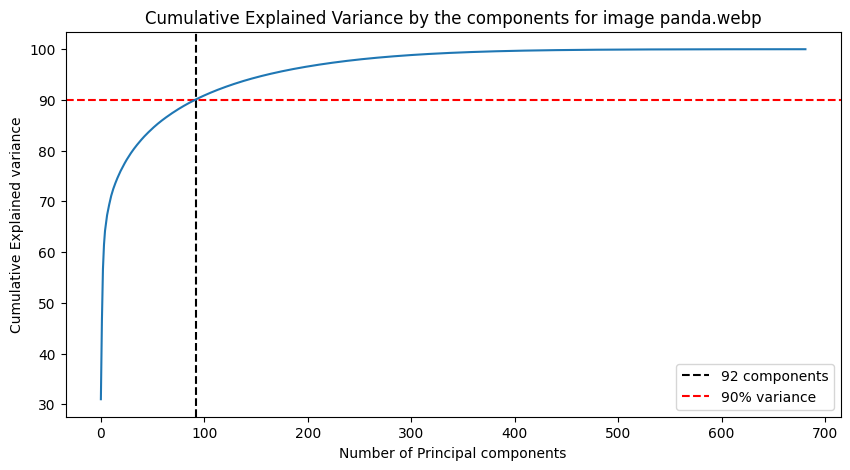

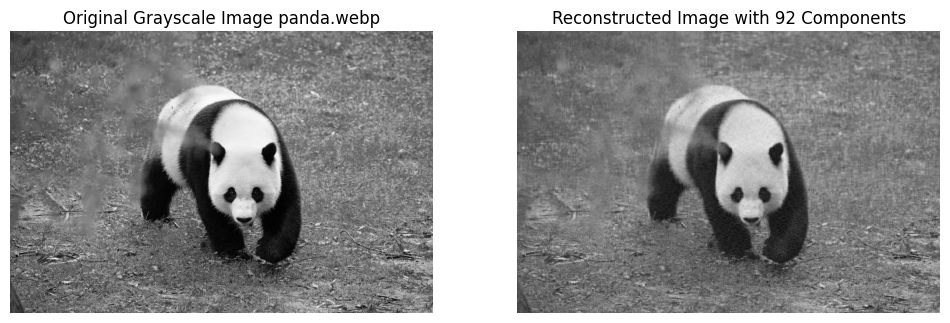

/tmp/ipykernel_105/1924949126.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image_pca = imageio.imread(p)
Number of components explaining 90% of the variance for image landscape-phot.jpg: 5


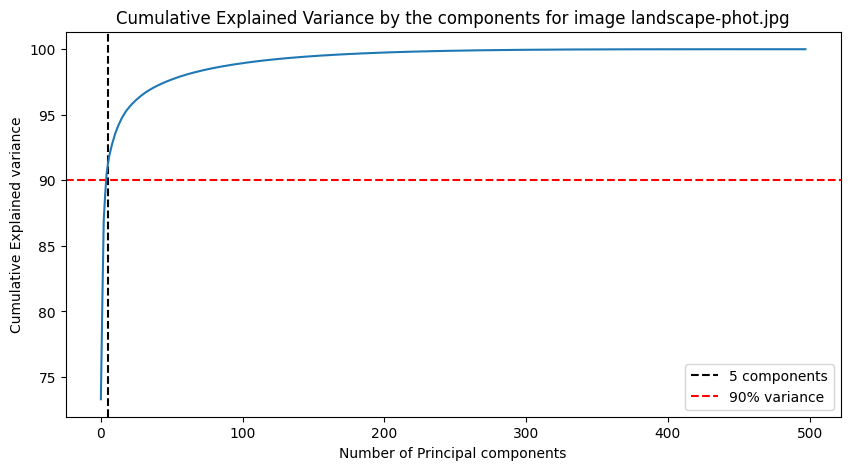

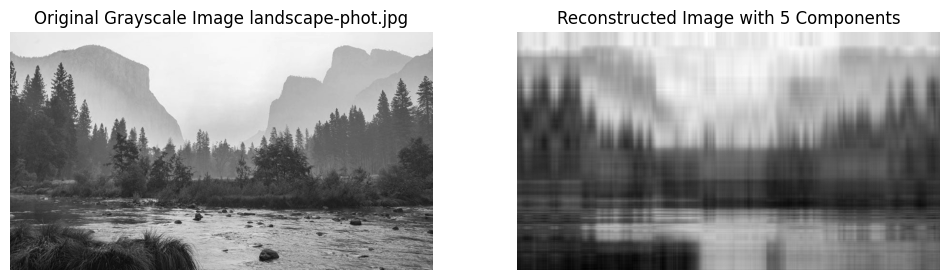

/tmp/ipykernel_105/1924949126.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image_pca = imageio.imread(p)
Number of components explaining 90% of the variance for image umbrella.webp: 30


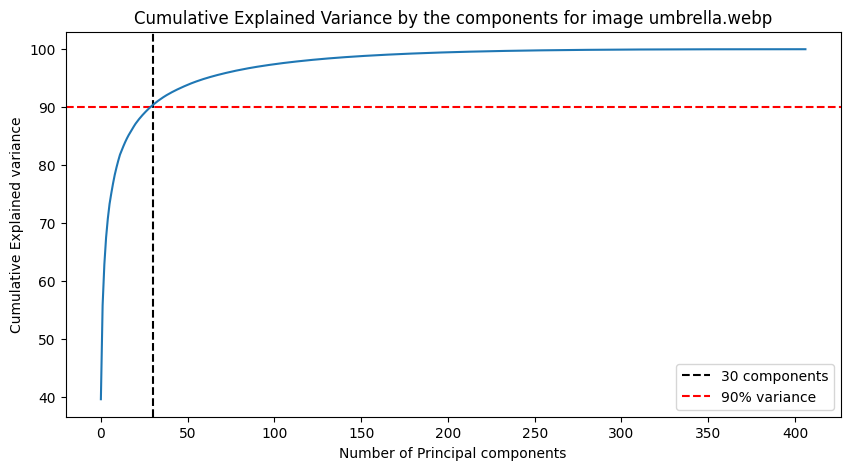

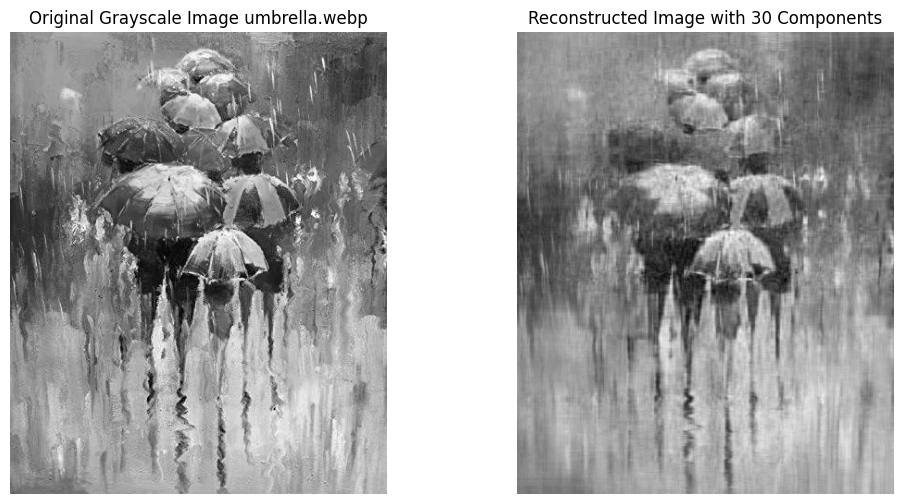

/tmp/ipykernel_105/1924949126.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image_pca = imageio.imread(p)
Number of components explaining 90% of the variance for image woman-selfie.jpg: 14


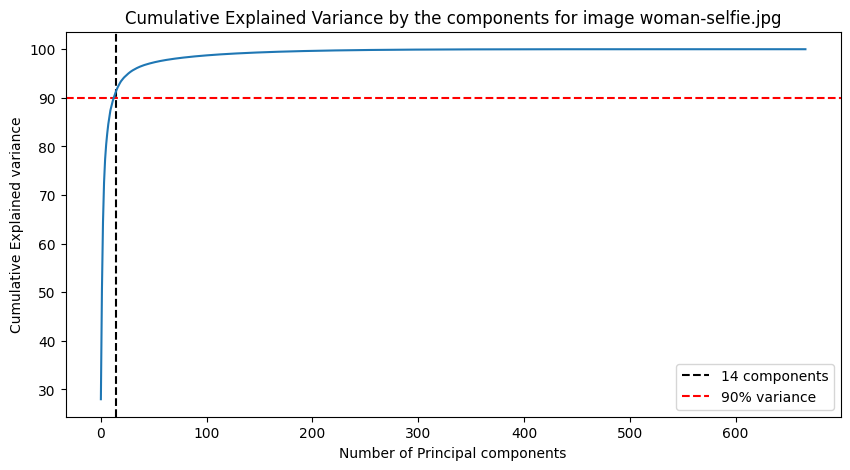

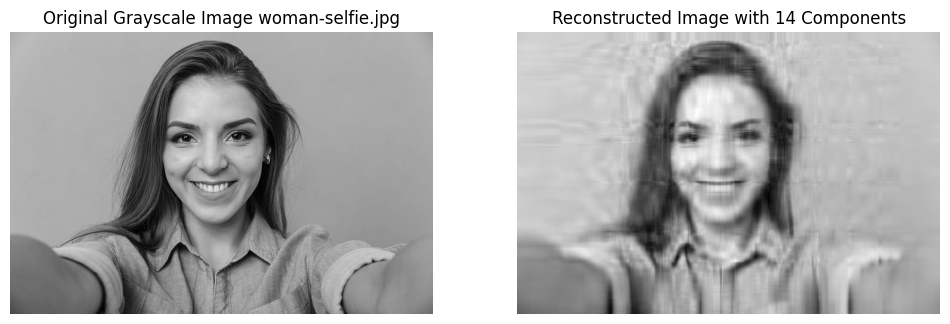

In [ ]:



for p in ["panda.webp", "landscape-phot.jpg", 'umbrella.webp', 'woman-selfie.jpg']:
    # Read image and convert to grayscale
    image_pca = imageio.imread(p)
    image_sum = image_pca.sum(axis=2)
    image_bw = image_sum / image_sum.max()
    
    # Perform PCA
    pca = PCA()
    pca.fit(image_bw)
    
    # Calculate cumulative variance
    var_cuma = np.cumsum(pca.explained_variance_ratio_) * 100
    k = np.argmax(var_cuma >= 90) + 1
    print(f"Number of components explaining 90% of the variance for image {p}: {k}")
    
    # Plot cumulative explained variance
    plt.figure(figsize=[10, 5])
    plt.title(f'Cumulative Explained Variance by the components for image {p}')
    plt.ylabel('Cumulative Explained variance')
    plt.xlabel('Number of Principal components')
    plt.axvline(x=k, color="k", linestyle="--", label=f"{k} components")
    plt.axhline(y=90, color="r", linestyle="--", label="90% variance")
    plt.legend()
    ax = plt.plot(var_cuma)
    
    # Reconstruct the image with the number of important components
    ipca = IncrementalPCA(n_components=k)
    image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))
    
    # Display the original and reconstructed images side by side
    fig, axarr = plt.subplots(1, 2, figsize=[12, 6])
    axarr[0].imshow(image_bw, cmap='gray')
    axarr[0].set_title(f'Original Grayscale Image {p}')
    axarr[0].axis('off')
    
    axarr[1].imshow(image_recon, cmap='gray')
    axarr[1].set_title(f'Reconstructed Image with {k} Components')
    axarr[1].axis('off')
    
    plt.show()


Some interesting things to note: The panda and painting have a lot more components than the others, this may be due to the many different colors in the painting and the panda image being the highest definition image. With the more components, the images look fairly close to their originals. 

Meanwhile the images with less components, may be due to similar color gradients. We can see the amount of components used to reconstruct the image is very important as the panda image looks nearly the same, but the landscape photo is nearly unidentifiable.

Now we will account for color in the our PCA image reconstruction.

Number of components explaining 90% of the variance for image panda.webp:
Blue channel: 84, Green channel: 60, Red channel: 83


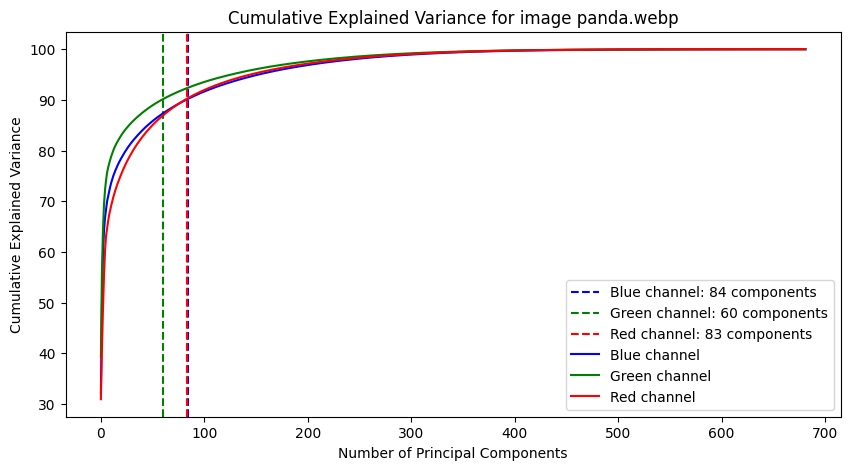

Mean Squared Error for image panda.webp: 17217.45050557507
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
File size of original image panda.webp: 207188 bytes
File size of reconstructed image panda.webp: 189660 bytes


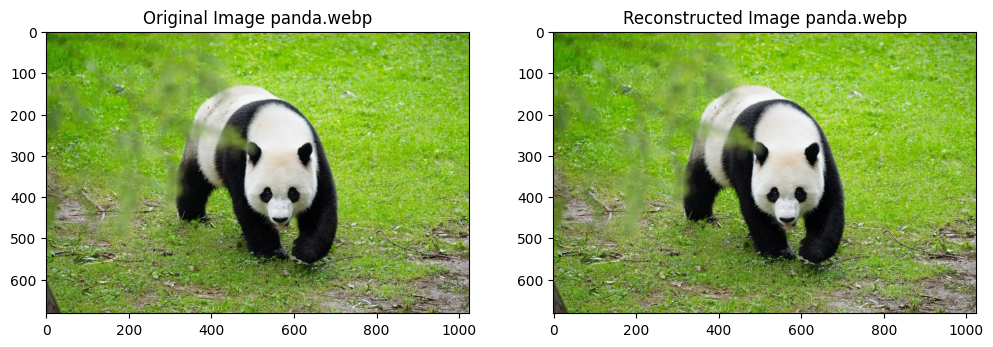

Number of components explaining 90% of the variance for image landscape-phot.jpg:
Blue channel: 6, Green channel: 5, Red channel: 4


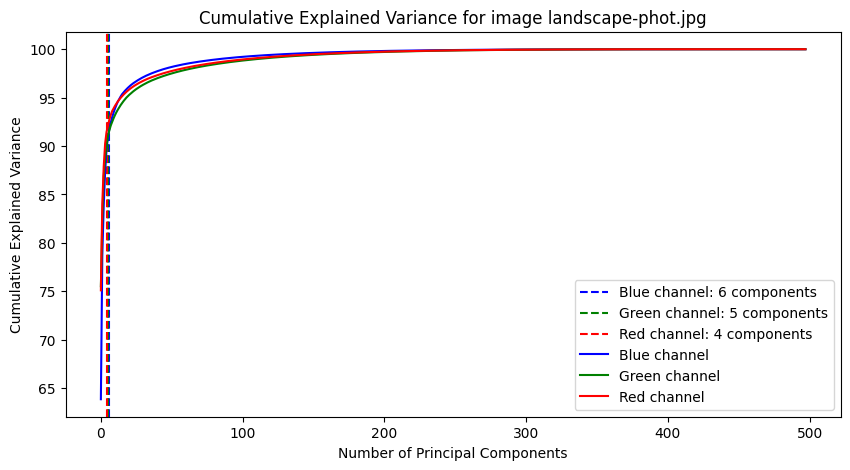

Mean Squared Error for image landscape-phot.jpg: 22027.700521849016
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
File size of original image landscape-phot.jpg: 81180 bytes
File size of reconstructed image landscape-phot.jpg: 71984 bytes


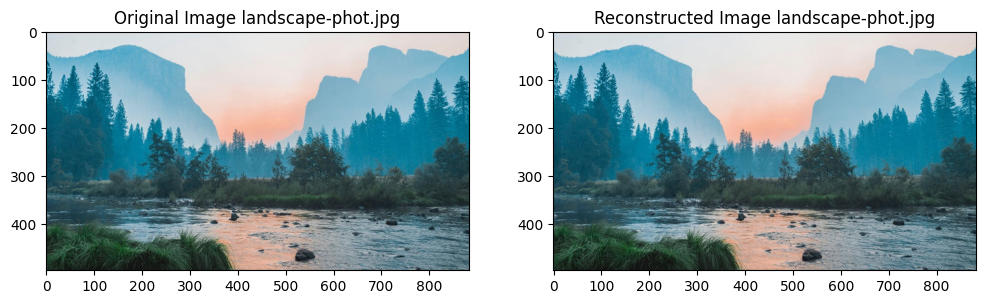

Number of components explaining 90% of the variance for image umbrella.webp:
Blue channel: 19, Green channel: 25, Red channel: 16


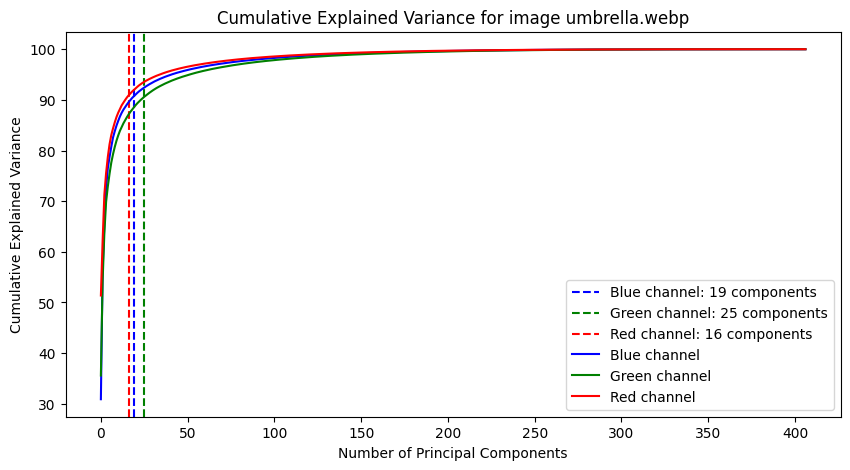

Mean Squared Error for image umbrella.webp: 22812.97644939561
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
File size of original image umbrella.webp: 60630 bytes
File size of reconstructed image umbrella.webp: 50868 bytes


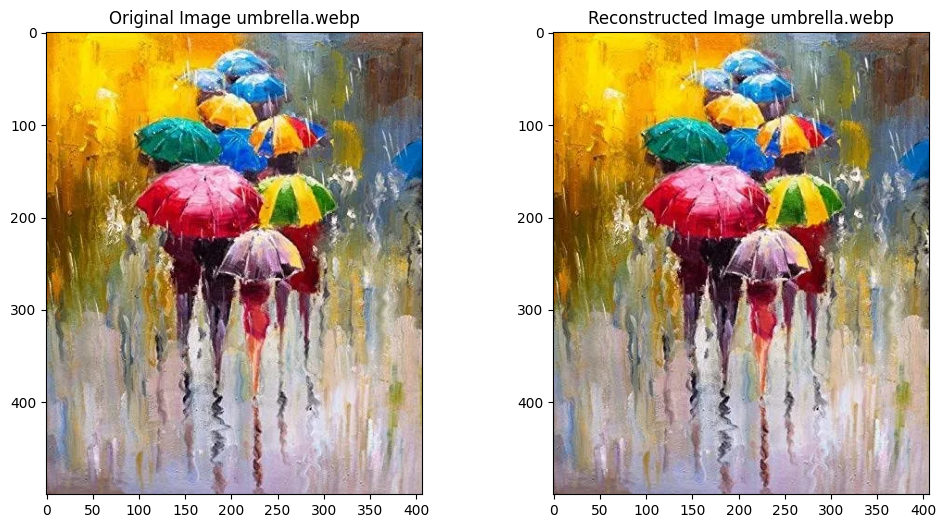

Number of components explaining 90% of the variance for image woman-selfie.jpg:
Blue channel: 14, Green channel: 13, Red channel: 11


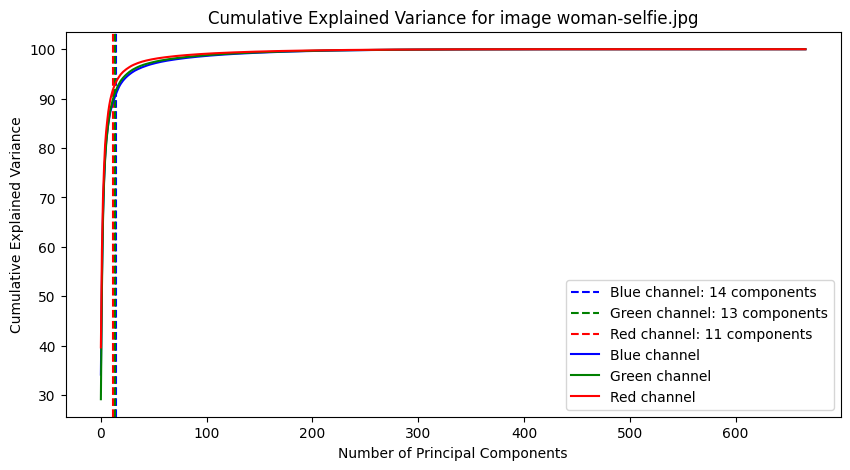

Mean Squared Error for image woman-selfie.jpg: 22274.6297254251
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
File size of original image woman-selfie.jpg: 69743 bytes
File size of reconstructed image woman-selfie.jpg: 67028 bytes


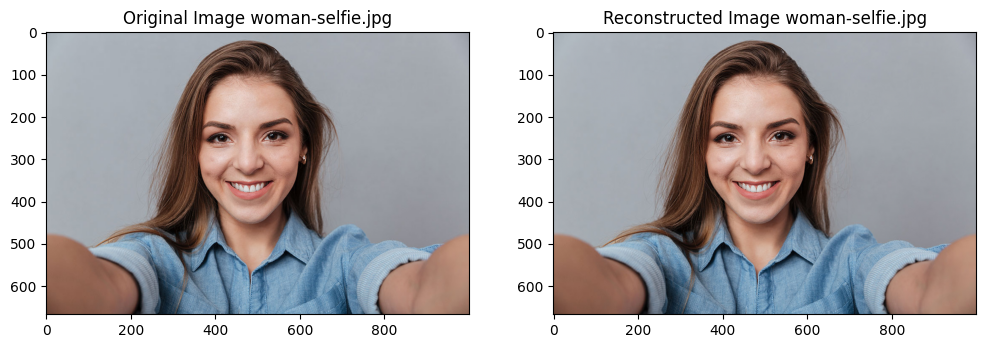

In [ ]:


for p in ["panda.webp", "landscape-phot.jpg", 'umbrella.webp', 'woman-selfie.jpg']:
    img = cv2.cvtColor(cv2.imread(p), cv2.COLOR_BGR2RGB)
    
    # Split into color channels
    blue, green, red = cv2.split(img)
    
    # Normalize the channels
    df_blue = blue / 255.0
    df_green = green / 255.0
    df_red = red / 255.0
    
    # Apply PCA to the blue channel
    pca_b = PCA()
    pca_b.fit(df_blue)
    var_cumu_b = np.cumsum(pca_b.explained_variance_ratio_) * 100
    k_b = np.argmax(var_cumu_b >= 90) + 1
    trans_pca_b = pca_b.transform(df_blue)
    
    # Apply PCA to the green channel
    pca_g = PCA()
    pca_g.fit(df_green)
    var_cumu_g = np.cumsum(pca_g.explained_variance_ratio_) * 100
    k_g = np.argmax(var_cumu_g >= 90) + 1
    trans_pca_g = pca_g.transform(df_green)
    
    # Apply PCA to the red channel
    pca_r = PCA()
    pca_r.fit(df_red)
    var_cumu_r = np.cumsum(pca_r.explained_variance_ratio_) * 100
    k_r = np.argmax(var_cumu_r >= 90) + 1
    trans_pca_r = pca_r.transform(df_red)
    
    # Print number of components for each channel
    print(f"Number of components explaining 90% of the variance for image {p}:")
    print(f"Blue channel: {k_b}, Green channel: {k_g}, Red channel: {k_r}")
    
    # Plot the cumulative explained variance for each channel
    plt.figure(figsize=[10, 5])
    plt.title(f'Cumulative Explained Variance for image {p}')
    plt.ylabel('Cumulative Explained Variance')
    plt.xlabel('Number of Principal Components')
    plt.axvline(x=k_b, color="b", linestyle="--", label=f"Blue channel: {k_b} components")
    plt.axvline(x=k_g, color="g", linestyle="--", label=f"Green channel: {k_g} components")
    plt.axvline(x=k_r, color="r", linestyle="--", label=f"Red channel: {k_r} components")
    plt.plot(var_cumu_b, 'b', label="Blue channel")
    plt.plot(var_cumu_g, 'g', label="Green channel")
    plt.plot(var_cumu_r, 'r', label="Red channel")
    plt.legend()
    plt.show()
    
    # Reconstruct the channels using the selected number of components
    b_arr = pca_b.inverse_transform(trans_pca_b)
    g_arr = pca_g.inverse_transform(trans_pca_g)
    r_arr = pca_r.inverse_transform(trans_pca_r)
    
    # Combine the reconstructed channels
    image_recon = (cv2.merge((b_arr,g_arr,r_arr)))
    
    mse = mean_squared_error(img, image_recon)
    print(f"Mean Squared Error for image {p}: {mse}")

    original_filename = f"original_{p}"
    reconstructed_filename = f"reconstructed_{p}"
    
    imwrite(original_filename, (img * 255).astype(np.uint8))
    imwrite(reconstructed_filename, (image_recon * 255).astype(np.uint8))
    
    # Compare file sizes
    original_size = os.path.getsize(original_filename)
    reconstructed_size = os.path.getsize(reconstructed_filename)
    print(f"File size of original image {p}: {original_size} bytes")
    print(f"File size of reconstructed image {p}: {reconstructed_size} bytes")
    
    #Plot Original Image vs Compressed
    plt.figure(figsize=[12, 6])
    plt.subplot(1, 2, 1)
    plt.title(f"Original Image {p}")
    plt.imshow(img)
    
    plt.subplot(1, 2, 2)
    plt.title(f"Reconstructed Image {p}")
    plt.imshow(image_recon)
    
    plt.show()

    



    

When accounting for color, the reconstructed images look remarkably similar to the original images, so much so that they seem identical. This is why I included MSE and even file size differences to be able to see if there was image compression. The reconstructed images are a bit smaller proving that compression did occur. It is remarkable to see how much a difference accounting for color makes when compressing images.

This also shows that different types of images do have wildly varying amounts of principal components accounting for the variance and yet we can reconstruct the images to look nearly identical to their originals even with these low amounts of components (only in color). 

# Notes for Future Improvement

If I had more time, I would've liked to compare reconstructed images using the same amount of components for both the greyscale and colored PCA compression. I would've also like to see if I could visualize the differences in how KNN and PCA selects what components to use in image compression. 

## Submission

* Using the `Share` button at the top right, enable public sharing, and enable Comment privileges. Then submit the created link on Canvas.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=932911fe-b679-41f4-a1c0-c47396200370' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>